<a href="https://colab.research.google.com/github/SauryanPandey/Stock-Price-Prediction-CNN/blob/main/stock_price_prediction_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/kaggle/input/suzlon-stock-price-data-10y/SUZLON.NS_stock_data_10y.csv")

In [ ]:
df.sort_values(by = "Date", ascending = True, inplace = True)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-06-05,26.582294,27.408688,26.444563,27.408688,27.408688,48152360.0
1,2014-06-06,28.418722,28.740097,27.730061,28.740097,28.740097,46588034.0
2,2014-06-09,29.841953,30.163328,29.612400,30.163328,30.163328,18229895.0
3,2014-06-10,31.632471,31.632471,30.760166,31.632471,31.632471,27163910.0
4,2014-06-11,33.193436,33.193436,33.193436,33.193436,33.193436,5797435.0
...,...,...,...,...,...,...,...
2460,2024-05-30,46.299999,46.900002,44.500000,45.400002,45.400002,31288700.0
2461,2024-05-31,45.700001,47.650002,44.299999,47.650002,47.650002,115665511.0
2462,2024-06-03,50.000000,50.000000,50.000000,50.000000,50.000000,62876628.0
2463,2024-06-04,52.099998,52.099998,47.500000,47.500000,47.500000,123854100.0


In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=1c9783f398d1b12668c247c5931aedcd9863fc6586073baf4b86b2df04ac2d1e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


#Calculating Indicator Values

In [ ]:
import ta
# Calculate Simple Moving Average (SMA)
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Calculate Exponential Moving Average (EMA)
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# Calculate MACD (Moving Average Convergence Divergence)
df['MACD'] = ta.trend.macd(df['Close'])
df['MACD_Signal'] = ta.trend.macd_signal(df['Close'])
df['MACD_Hist'] = ta.trend.macd_diff(df['Close'])

# Calculate RSI (Relative Strength Index)
df['RSI_14'] = ta.momentum.rsi(df['Close'], window=14)

# Calculate CCI (Commodity Channel Index)
df['CCI_20'] = ta.trend.cci(high=df['High'], low=df['Low'], close=df['Close'], window=20)

# Calculate TRIX (Triple Exponential Average)
df['TRIX_10'] = ta.trend.trix(df['Close'], window=10)

# Calculate Rate of Change (ROC)
df['ROC_10'] = ta.momentum.roc(df['Close'], window=10)

# Calculate Stochastic Oscillator (KDJ / KDJk)
df['KDJk'] = ta.momentum.stoch(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=3)

# Calculate Bollinger Bands
df['BB_High'], df['BB_Low'] = ta.volatility.BollingerBands(df['Close']).bollinger_hband(), ta.volatility.BollingerBands(df['Close']).bollinger_lband()

df['Ease_of_Movement'] = ta.volume.ease_of_movement(df['High'], df['Low'], df['Volume'], window=14)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,MACD,MACD_Signal,MACD_Hist,RSI_14,CCI_20,TRIX_10,ROC_10,KDJk,BB_High,BB_Low,Ease_of_Movement
0,2014-06-05,26.582294,27.408688,26.444563,27.408688,27.408688,48152360.0,NaN,27.408688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-06-06,28.418722,28.740097,27.730061,28.740097,28.740097,46588034.0,NaN,27.535489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.836748
2,2014-06-09,29.841953,30.163328,29.612400,30.163328,30.163328,18229895.0,NaN,27.785759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.994903
3,2014-06-10,31.632471,31.632471,30.760166,31.632471,31.632471,27163910.0,NaN,28.152113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.201793
4,2014-06-11,33.193436,33.193436,33.193436,33.193436,33.193436,5797435.0,NaN,28.632239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2024-05-30,46.299999,46.900002,44.500000,45.400002,45.400002,31288700.0,42.7400,43.566326,1.263158,0.941713,0.321446,58.074512,87.307440,0.606329,7.582941,67.567580,48.062086,37.417914,6.711713
2461,2024-05-31,45.700001,47.650002,44.299999,47.650002,47.650002,115665511.0,43.0375,43.955248,1.427539,1.038878,0.388661,63.790562,100.025055,0.634858,11.331783,87.837854,48.745028,37.329972,0.796477
2462,2024-06-03,50.000000,50.000000,50.000000,50.000000,50.000000,62876628.0,43.4700,44.530939,1.727523,1.176607,0.550916,68.605023,163.677027,0.698822,17.370898,100.000000,49.869485,37.070516,0.000000
2463,2024-06-04,52.099998,52.099998,47.500000,47.500000,47.500000,123854100.0,43.8050,44.813706,1.743436,1.289973,0.453463,59.535959,122.867528,0.735911,7.832012,61.825740,50.310913,37.299087,-0.742813


In [ ]:
df.dropna(inplace = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,MACD,MACD_Signal,MACD_Hist,RSI_14,CCI_20,TRIX_10,ROC_10,KDJk,BB_High,BB_Low,Ease_of_Movement
33,2014-07-22,24.057205,24.057205,22.633974,22.817617,22.817617,4383188.0,24.098525,23.948220,-1.265075,-1.347207,0.082131,41.006585,-38.482846,-0.970601,-6.226415,43.382372,27.802458,20.394592,-8.944378
34,2014-07-23,22.496243,22.955349,21.853493,22.725796,22.725796,3836074.0,23.864381,23.831798,-1.207001,-1.319165,0.112165,40.610105,-57.600808,-0.907881,-1.785713,41.911790,27.282752,20.446009,-27.033685
35,2014-07-24,22.863527,22.863527,21.945313,22.174868,22.174868,2219868.0,23.657783,23.673996,-1.191695,-1.293671,0.101977,38.222183,-59.919117,-0.855878,-5.294110,33.088266,26.958133,20.357432,-0.000041
36,2014-07-25,22.128956,22.174868,21.164831,21.578028,21.578028,3167298.0,23.451184,23.474380,-1.213733,-1.277684,0.063951,35.768416,-83.166668,-0.824189,-3.092777,24.615395,26.729042,20.173327,-23.425121
37,2014-07-28,21.532118,21.532118,20.522081,20.659815,20.659815,4411813.0,23.182607,23.206326,-1.290416,-1.280230,-0.010186,32.329746,-107.373113,-0.824901,-2.386109,13.186854,26.451046,19.914168,-14.715068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2024-05-30,46.299999,46.900002,44.500000,45.400002,45.400002,31288700.0,42.740000,43.566326,1.263158,0.941713,0.321446,58.074512,87.307440,0.606329,7.582941,67.567580,48.062086,37.417914,6.711713
2461,2024-05-31,45.700001,47.650002,44.299999,47.650002,47.650002,115665511.0,43.037500,43.955248,1.427539,1.038878,0.388661,63.790562,100.025055,0.634858,11.331783,87.837854,48.745028,37.329972,0.796477
2462,2024-06-03,50.000000,50.000000,50.000000,50.000000,50.000000,62876628.0,43.470000,44.530939,1.727523,1.176607,0.550916,68.605023,163.677027,0.698822,17.370898,100.000000,49.869485,37.070516,0.000000
2463,2024-06-04,52.099998,52.099998,47.500000,47.500000,47.500000,123854100.0,43.805000,44.813706,1.743436,1.289973,0.453463,59.535959,122.867528,0.735911,7.832012,61.825740,50.310913,37.299087,-0.742813


In [ ]:
df.iloc[:11, [4]].to_numpy().reshape(1, -1)[0]

array([22.817617, 22.725796, 22.174868, 21.578028, 20.659815, 19.7416  ,
       19.925243, 19.052938, 19.971153, 20.935278, 21.945313])

In [ ]:
df.shape[0]

2411

#Data labeling (Buy:1, Sell:0, Hold: 2)

In [ ]:
#Buy:1, Sell:0, Hold: 2
def label_data(df, window_size = 11):

    mid_idx = window_size // 2

    i = 0
    idx = []
    labels = []
    while(i <= df.shape[0] - window_size + 1):
        temp_arr = df.iloc[i : i + window_size, [4]].to_numpy().reshape(1, -1)[0]

        if(temp_arr[mid_idx] == min(temp_arr)):
            labels.append(1)
        elif(temp_arr[mid_idx] == max(temp_arr)):
            labels.append(0)
        else:
            labels.append(2)

        idx.append(i + mid_idx)
        i += 1

    return idx, labels

In [ ]:
idx, labels = label_data(df, 11)
df = df.iloc[idx[0] : idx[-1] + 1]
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,MACD,MACD_Signal,MACD_Hist,RSI_14,CCI_20,TRIX_10,ROC_10,KDJk,BB_High,BB_Low,Ease_of_Movement
38,2014-07-30,20.384350,20.430260,19.649778,19.741600,19.741600,2806440.0,22.900256,22.876352,-1.409037,-1.305991,-0.103046,29.296598,-137.743354,-0.862484,-6.113539,1.980211,26.329340,19.471172,-27.451097
39,2014-07-31,19.649778,20.430260,18.777475,19.925243,19.925243,4137131.0,22.604132,22.595294,-1.471267,-1.339047,-0.132220,30.697017,-138.732288,-0.908798,-9.583329,21.739142,25.986511,19.221753,-17.424265
40,2014-08-01,19.557957,20.062975,18.961119,19.052938,19.052938,4161710.0,22.291939,22.257927,-1.572842,-1.385806,-0.187036,27.872925,-143.379847,-0.973938,-13.179921,5.217369,25.773711,18.810167,-2.431043
41,2014-08-04,19.971153,19.971153,19.649778,19.971153,19.971153,5602735.0,22.002702,22.040139,-1.561251,-1.420895,-0.140356,34.684671,-109.458439,-1.016083,-12.121217,22.608694,25.237745,18.767658,1.711740
42,2014-08-05,20.108885,20.935278,19.971153,20.935278,20.935278,4193975.0,21.770853,21.934914,-1.457467,-1.428209,-0.029258,40.986743,-64.995821,-1.011579,-11.969107,40.869571,24.586882,18.954823,14.775752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2024-05-24,49.000000,49.000000,45.900002,45.950001,45.950001,53070069.0,42.057500,42.763304,1.232165,0.505080,0.727086,63.032913,204.778427,0.445245,16.035362,72.522527,46.759869,37.355131,2.628604
2457,2024-05-27,45.250000,46.700001,45.000000,45.200001,45.200001,38521150.0,42.210000,42.995371,1.264421,0.656948,0.607473,59.762934,125.166463,0.530732,13.283205,65.765769,47.108224,37.311776,-7.061062
2458,2024-05-28,45.500000,45.849998,43.400002,43.950001,43.950001,26264263.0,42.325000,43.086288,1.175568,0.760672,0.414896,54.672230,71.933050,0.564561,12.692310,54.504505,47.272979,37.377020,-11.427110
2459,2024-05-29,43.900002,46.099998,43.549999,46.099998,46.099998,30979346.0,42.550000,43.373308,1.264067,0.861351,0.402716,60.849490,88.167967,0.594775,14.676609,73.873851,47.748557,37.351443,1.646245


In [ ]:
print(labels[-30:])

[2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2]


In [ ]:
df["Labels"] = labels
df

/tmp/ipykernel_34/1982047890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Labels"] = labels


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,MACD,...,MACD_Hist,RSI_14,CCI_20,TRIX_10,ROC_10,KDJk,BB_High,BB_Low,Ease_of_Movement,Labels
38,2014-07-30,20.384350,20.430260,19.649778,19.741600,19.741600,2806440.0,22.900256,22.876352,-1.409037,...,-0.103046,29.296598,-137.743354,-0.862484,-6.113539,1.980211,26.329340,19.471172,-27.451097,2
39,2014-07-31,19.649778,20.430260,18.777475,19.925243,19.925243,4137131.0,22.604132,22.595294,-1.471267,...,-0.132220,30.697017,-138.732288,-0.908798,-9.583329,21.739142,25.986511,19.221753,-17.424265,2
40,2014-08-01,19.557957,20.062975,18.961119,19.052938,19.052938,4161710.0,22.291939,22.257927,-1.572842,...,-0.187036,27.872925,-143.379847,-0.973938,-13.179921,5.217369,25.773711,18.810167,-2.431043,1
41,2014-08-04,19.971153,19.971153,19.649778,19.971153,19.971153,5602735.0,22.002702,22.040139,-1.561251,...,-0.140356,34.684671,-109.458439,-1.016083,-12.121217,22.608694,25.237745,18.767658,1.711740,2
42,2014-08-05,20.108885,20.935278,19.971153,20.935278,20.935278,4193975.0,21.770853,21.934914,-1.457467,...,-0.029258,40.986743,-64.995821,-1.011579,-11.969107,40.869571,24.586882,18.954823,14.775752,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2024-05-24,49.000000,49.000000,45.900002,45.950001,45.950001,53070069.0,42.057500,42.763304,1.232165,...,0.727086,63.032913,204.778427,0.445245,16.035362,72.522527,46.759869,37.355131,2.628604,2
2457,2024-05-27,45.250000,46.700001,45.000000,45.200001,45.200001,38521150.0,42.210000,42.995371,1.264421,...,0.607473,59.762934,125.166463,0.530732,13.283205,65.765769,47.108224,37.311776,-7.061062,2
2458,2024-05-28,45.500000,45.849998,43.400002,43.950001,43.950001,26264263.0,42.325000,43.086288,1.175568,...,0.414896,54.672230,71.933050,0.564561,12.692310,54.504505,47.272979,37.377020,-11.427110,1
2459,2024-05-29,43.900002,46.099998,43.549999,46.099998,46.099998,30979346.0,42.550000,43.373308,1.264067,...,0.402716,60.849490,88.167967,0.594775,14.676609,73.873851,47.748557,37.351443,1.646245,2


In [ ]:
df.columns[4]

'Close'

In [ ]:
X = df[df.columns[1:20]].to_numpy()
Y = df["Labels"].to_numpy()

#Normalizing of data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_normalized = scaler.fit_transform(X)

print(X_normalized[0])

[  0.83146645   0.79373916   0.80606565   0.76993698   0.76993698
  -0.71271245   1.13842252   1.13700301  -2.35639905  -2.30278075
  -0.63011019  -1.50895033  -1.15887896  -1.0681514   -0.51532257
  -1.4951163    1.23713835   1.00759959 -15.21974706]


In [ ]:
Y

array([2, 2, 1, ..., 1, 2, 2])

#Using Random Forest for important features selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_normalized, Y)

importances = rf.feature_importances_

print(np.array(importances))

[0.03428351 0.03417007 0.03569863 0.03614762 0.03559593 0.06160987
 0.03767782 0.03781259 0.05159663 0.04949245 0.06060495 0.07950543
 0.07751408 0.06073212 0.0615957  0.08372466 0.04078255 0.04164792
 0.07980747]


In [ ]:
features_idx = np.argsort(importances) + np.ones(len(importances))
features = []
imp = []
i = len(features_idx) - 1
for i in np.flip(features_idx).astype(int):
    features.append(df.columns[i])
    imp.append(importances[i - 1])
print(imp)
print(features)

[0.08372466091027676, 0.07980747150761025, 0.0795054293289301, 0.07751408448781495, 0.061609871703398905, 0.06159569528604486, 0.06073211879370061, 0.06060494534058805, 0.05159663059207276, 0.04949244611714781, 0.04164791707567941, 0.04078255182792074, 0.037812586530566454, 0.03767782122083246, 0.036147617414848184, 0.03569863352363239, 0.03559593279835648, 0.03428351431817974, 0.03417007122239896]
['KDJk', 'Ease_of_Movement', 'RSI_14', 'CCI_20', 'Volume', 'ROC_10', 'TRIX_10', 'MACD_Hist', 'MACD', 'MACD_Signal', 'BB_Low', 'BB_High', 'EMA_20', 'SMA_20', 'Close', 'Low', 'Adj Close', 'Open', 'High']


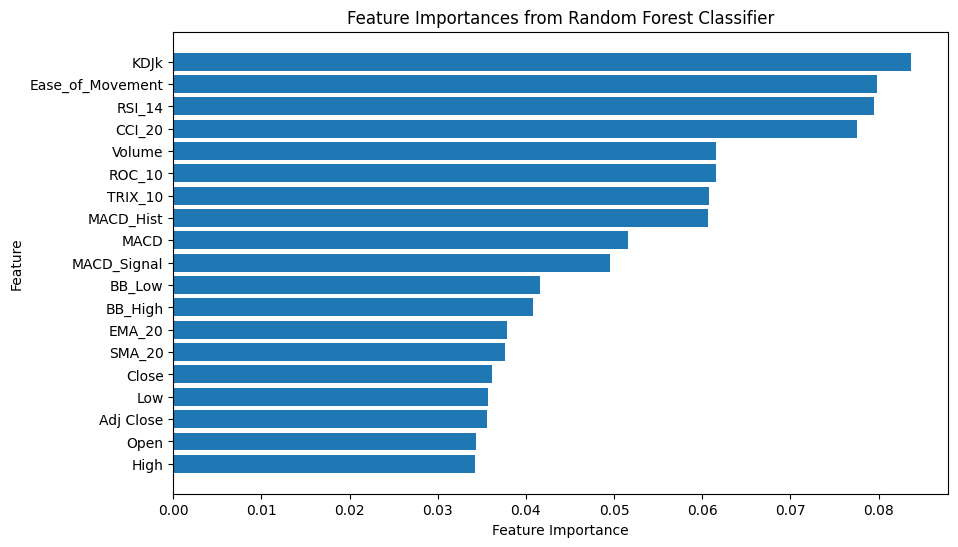

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(features, imp)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
updated_df = df[features[:16]]
updated_df

,KDJk,Ease_of_Movement,RSI_14,CCI_20,Volume,ROC_10,TRIX_10,MACD_Hist,MACD,MACD_Signal,BB_Low,BB_High,EMA_20,SMA_20,Close,Low
38,1.980211,-27.451097,29.296598,-137.743354,2806440.0,-6.113539,-0.862484,-0.103046,-1.409037,-1.305991,19.471172,26.329340,22.876352,22.900256,19.741600,19.649778
39,21.739142,-17.424265,30.697017,-138.732288,4137131.0,-9.583329,-0.908798,-0.132220,-1.471267,-1.339047,19.221753,25.986511,22.595294,22.604132,19.925243,18.777475
40,5.217369,-2.431043,27.872925,-143.379847,4161710.0,-13.179921,-0.973938,-0.187036,-1.572842,-1.385806,18.810167,25.773711,22.257927,22.291939,19.052938,18.961119
41,22.608694,1.711740,34.684671,-109.458439,5602735.0,-12.121217,-1.016083,-0.140356,-1.561251,-1.420895,18.767658,25.237745,22.040139,22.002702,19.971153,19.649778
42,40.869571,14.775752,40.986743,-64.995821,4193975.0,-11.969107,-1.011579,-0.029258,-1.457467,-1.428209,18.954823,24.586882,21.934914,21.770853,20.935278,19.971153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,72.522527,2.628604,63.032913,204.778427,53070069.0,16.035362,0.445245,0.727086,1.232165,0.505080,37.355131,46.759869,42.763304,42.057500,45.950001,45.900002
2457,65.765769,-7.061062,59.762934,125.166463,38521150.0,13.283205,0.530732,0.607473,1.264421,0.656948,37.311776,47.108224,42.995371,42.210000,45.200001,45.000000
2458,54.504505,-11.427110,54.672230,71.933050,26264263.0,12.692310,0.564561,0.414896,1.175568,0.760672,37.377020,47.272979,43.086288,42.325000,43.950001,43.400002
2459,73.873851,1.646245,60.849490,88.167967,30979346.0,14.676609,0.594775,0.402716,1.264067,0.861351,37.351443,47.748557,43.373308,42.550000,46.099998,43.549999


In [ ]:
updated_X = updated_df.to_numpy()
reduced_X = scaler.fit_transform(updated_X)
reduced_X.shape

(2402, 16)

In [ ]:
Y.shape

(2402,)

In [ ]:
reduced_X

array([[ -1.4951163 , -15.21974706,  -1.50895033, ...,   1.13842252,
          0.76993698,   0.80606565],
       [ -0.80898933,  -9.64443646,  -1.40331271, ...,   1.10639754,
          0.78932356,   0.71184352],
       [ -1.3827063 ,  -1.30761927,  -1.61634209, ...,   1.07263475,
          0.6972372 ,   0.73167989],
       ...,
       [  0.32878478,  -6.30978425,   0.40520678, ...,   3.23915442,
          3.3255381 ,   3.37145474],
       [  1.00138345,   0.95951243,   0.8711753 , ...,   3.26348755,
          3.5525062 ,   3.38765672],
       [  0.78239878,   3.77611057,   0.66185074, ...,   3.28403554,
          3.47860993,   3.49027143]])

#Image Conversion

In [ ]:
img_X = reduced_X.reshape(2402, 4, 4)
img_X.shape

(2402, 4, 4)

In [ ]:
img_X[0]

array([[ -1.4951163 , -15.21974706,  -1.50895033,  -1.15887896],
       [ -0.71271245,  -0.51532257,  -1.0681514 ,  -0.63011019],
       [ -2.35639905,  -2.30278075,   1.00759959,   1.23713835],
       [  1.13700301,   1.13842252,   0.76993698,   0.80606565]])

In [ ]:
!pip install pillow

[[113 116  63 131]
 [ 74 118  99 255]
 [ 43   0 243 237]
 [249 240 236 241]]


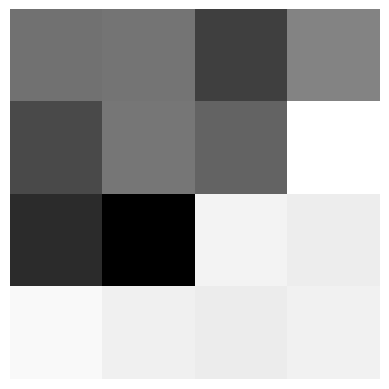

Label: 2


In [ ]:
from PIL import Image
normalized_array = ((img_X[200] - img_X[200].min()) / (img_X[200].max() - img_X[200].min()) * 255).astype(np.uint8)
print(normalized_array)
image = Image.fromarray(normalized_array)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()
print(f"Label: {Y[200]}")

In [ ]:
for i in range(len(Y)):
    img_X[i] = ((img_X[i] - img_X[i].min()) / (img_X[i].max() - img_X[i].min()) * 255).astype(np.uint8)
print(img_X)

[[[212.   0. 212. 217.]
  [224. 227. 219. 226.]
  [199. 200. 251. 255.]
  [253. 253. 247. 248.]]

 [[207.   0. 193. 199.]
  [210. 208. 200. 207.]
  [168. 171. 249. 255.]
  [252. 252. 245. 243.]]

 [[ 83.  88.  67.  94.]
  [129. 107.  95. 100.]
  [  0.  12. 238. 255.]
  [247. 247. 222. 224.]]

 ...

 [[174.   0. 176. 183.]
  [156. 187. 183. 229.]
  [215. 199. 248. 253.]
  [253. 251. 253. 255.]]

 [[ 86.  83.  78.  73.]
  [  0.  83.  66. 173.]
  [152. 114. 227. 241.]
  [242. 235. 255. 244.]]

 [[ 68. 255.  60.  68.]
  [  0.  47.  63. 134.]
  [144. 116. 215. 229.]
  [230. 224. 236. 237.]]]


#CNN Model Building

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from torchvision import transforms

In [ ]:
img_X_tensor = torch.from_numpy(img_X).unsqueeze(1) #For adding a channel dimension which is 1 here
Y_tensor = torch.from_numpy(Y)
print(img_X_tensor.shape)

torch.Size([2402, 1, 4, 4])


In [ ]:
transform = transforms.Compose([
    transforms.Normalize((255/2), (255/2))
])

class CustomImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

dataset = CustomImageDataset(img_X_tensor, Y_tensor, transform=transform)

In [ ]:
img, lab = dataset.__getitem__(200)
print(img, lab)

tensor([[[-0.1137, -0.0902, -0.5059,  0.0275],
         [-0.4196, -0.0745, -0.2235,  1.0000],
         [-0.6627, -1.0000,  0.9059,  0.8588],
         [ 0.9529,  0.8824,  0.8510,  0.8902]]], dtype=torch.float64) tensor(2)


In [ ]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
print(train_dataset.__len__())

1921


In [ ]:
train_dataset[1920]

(tensor([[[-0.2941,  0.2784, -0.3961, -0.1373],
          [ 0.7255, -0.7804, -0.5216, -0.7882],
          [-1.0000, -0.6784,  0.6863,  1.0000],
          [ 0.8275,  0.8588,  0.5843,  0.5922]]], dtype=torch.float64),
 tensor(1))

In [ ]:
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class model_CNN(nn.Module):
    def __init__(self):
        super(model_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1, stride = 1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1, stride = 1)
        self.fc1 = nn.Linear(32 * 6 * 6, 128)
        self.dropout = nn.Dropout(0.1)  #Prevents overfitting by randomly disabling 10% of neurons.
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, padding=1, stride=1)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, padding=1, stride=1)
        x = x.view(-1, 32 * 6 * 6)     #Flattening
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model_CNN().to(device)
print(model)

model_CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
)


In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):

    size = len(dataloader.dataset)
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.float().to(device), y.long().to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.float().to(device), y.long().to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

#Training the model

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum = 0.9)

epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.990870  [   16/ 1921]
loss: 0.676489  [ 1616/ 1921]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.698645 

Epoch 2
-------------------------------
loss: 0.738949  [   16/ 1921]
loss: 0.676108  [ 1616/ 1921]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.698651 

Epoch 3
-------------------------------
loss: 0.614132  [   16/ 1921]
loss: 0.676477  [ 1616/ 1921]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.698649 

Epoch 4
-------------------------------
loss: 0.614171  [   16/ 1921]
loss: 0.739216  [ 1616/ 1921]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.698644 

Epoch 5
-------------------------------
loss: 0.552140  [   16/ 1921]
loss: 0.676469  [ 1616/ 1921]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.698647 

Epoch 6
-------------------------------
loss: 0.614059  [   16/ 1921]
loss: 0.676476  [ 1616/ 1921]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.698650 

Epoch 7
-------------------------------
loss: 0.551453  [   16/ 1921]
loss: 0.676447  [ 

#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = []
y_true = []

for inputs, labels in test_loader:

        inputs, labels = inputs.float().to(device), labels.long().to(device)
        output = model(inputs)

        output = (torch.max(output, 1)[1]).data.cpu().numpy()
        y_pred.extend(output)

        labels = labels.data.cpu().numpy()
        y_true.extend(labels)

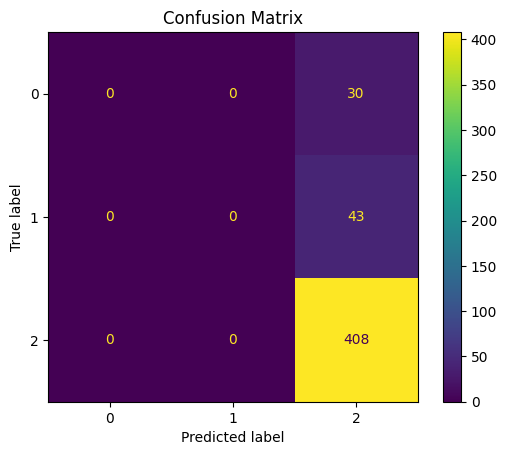

In [ ]:
classes = (0, 1, 2)
cf_matrix = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix)
cmd.plot()
plt.title("Confusion Matrix")
plt.show()

#Handling Imbalance in Dataset

<Axes: xlabel='Labels', ylabel='count'>

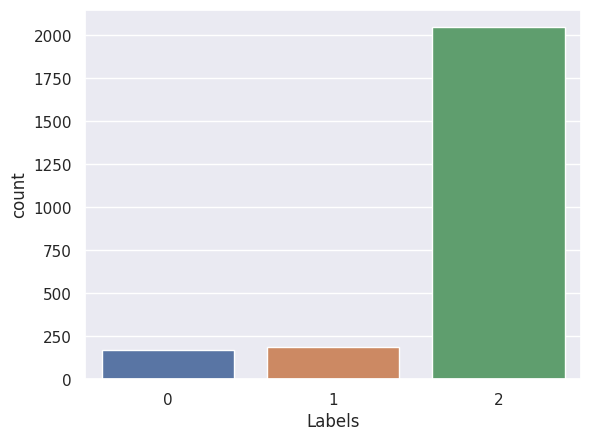

In [ ]:
import seaborn as sns
sns.set()
sns.countplot(df, x = "Labels")

In [ ]:
df["Labels"].value_counts()

Labels
2    2046
1     187
0     169
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)
reduced_X_res, Y_res = ros.fit_resample(reduced_X, Y)

In [ ]:
reduced_X_res.shape

(6138, 16)

In [ ]:
Y_res.shape

(6138,)

In [ ]:
img_X_res = reduced_X_res.reshape(6138, 4, 4)
img_X_res.shape

(6138, 4, 4)

In [ ]:
for i in range(len(Y_res)):
    img_X_res[i] = ((img_X_res[i] - img_X_res[i].min()) / (img_X_res[i].max() - img_X_res[i].min()) * 255).astype(np.uint8)
print(img_X_res)

[[[212.   0. 212. 217.]
  [224. 227. 219. 226.]
  [199. 200. 251. 255.]
  [253. 253. 247. 248.]]

 [[207.   0. 193. 199.]
  [210. 208. 200. 207.]
  [168. 171. 249. 255.]
  [252. 252. 245. 243.]]

 [[ 83.  88.  67.  94.]
  [129. 107.  95. 100.]
  [  0.  12. 238. 255.]
  [247. 247. 222. 224.]]

 ...

 [[202.   0. 208. 211.]
  [206. 213. 214. 248.]
  [191. 183. 255. 251.]
  [254. 253. 250. 250.]]

 [[116. 218. 113. 171.]
  [175. 220.  54. 255.]
  [ 22.   0. 205. 242.]
  [226. 225. 213. 215.]]

 [[131. 255.   0.  44.]
  [203. 139. 146. 163.]
  [127. 143. 233. 232.]
  [231. 232. 214. 216.]]]


In [ ]:
img_X_res_tensor = torch.from_numpy(img_X_res).unsqueeze(1) #For adding a channel dimension which is 1 here
Y_res_tensor = torch.from_numpy(Y_res)
print(img_X_res_tensor.shape)

torch.Size([6138, 1, 4, 4])


In [ ]:
res_dataset = CustomImageDataset(img_X_res_tensor, Y_res_tensor, transform=transform)
res_train_size = int(0.8 * len(res_dataset))
res_test_size = len(res_dataset) - res_train_size
res_train_dataset, res_test_dataset = random_split(res_dataset, [res_train_size, res_test_size])
print(res_train_dataset.__len__())

4910


In [ ]:
from collections import Counter
Counter(Y_res)

Counter({2: 2046, 1: 2046, 0: 2046})

In [ ]:
batch_size = 16
res_train_loader = DataLoader(res_train_dataset, batch_size=batch_size, shuffle=True)
res_test_loader = DataLoader(res_test_dataset, batch_size=batch_size, shuffle=False)

#Training the model after Resampling

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum = 0.9)

epochs = 1000
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(res_train_loader, model, loss_fn, optimizer)
    test_loop(res_test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.176094  [   16/ 4910]
loss: 0.968659  [ 1616/ 4910]
loss: 0.860654  [ 3216/ 4910]
loss: 0.865959  [ 4816/ 4910]
Test Error: 
 Accuracy: 70.8%, Avg loss: 0.826916 

Epoch 2
-------------------------------
loss: 0.861464  [   16/ 4910]
loss: 0.872167  [ 1616/ 4910]
loss: 0.980175  [ 3216/ 4910]
loss: 0.821216  [ 4816/ 4910]
Test Error: 
 Accuracy: 73.4%, Avg loss: 0.814308 

Epoch 3
-------------------------------
loss: 0.892984  [   16/ 4910]
loss: 0.880327  [ 1616/ 4910]
loss: 0.816517  [ 3216/ 4910]
loss: 0.697603  [ 4816/ 4910]
Test Error: 
 Accuracy: 73.4%, Avg loss: 0.809907 

Epoch 4
-------------------------------
loss: 0.946198  [   16/ 4910]
loss: 0.763399  [ 1616/ 4910]
loss: 0.728595  [ 3216/ 4910]
loss: 0.862540  [ 4816/ 4910]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.817397 

Epoch 5
-------------------------------
loss: 0.754432  [   16/ 4910]
loss: 0.763350  [ 1616/ 4910]
loss: 0.741251  [ 3216/ 4910]
loss: 0.910745  [ 4816

#Confusion Matrix after Training on Resampled Dataset

In [ ]:
res_y_pred = []
res_y_true = []

for inputs, labels in res_test_loader:

        inputs, labels = inputs.float().to(device), labels.long().to(device)
        output = model(inputs)

        output = (torch.max(output, 1)[1]).data.cpu().numpy()
        res_y_pred.extend(output)

        labels = labels.data.cpu().numpy()
        res_y_true.extend(labels)

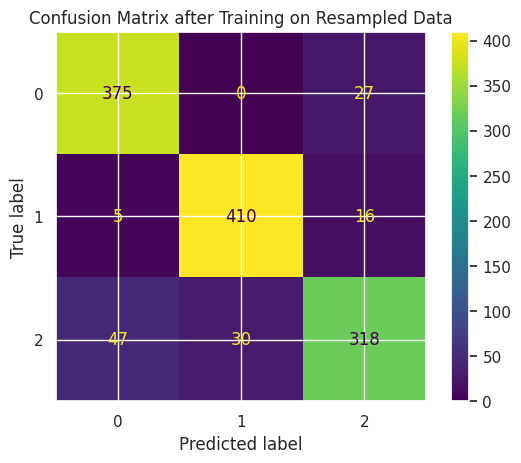

In [ ]:
classes = (0, 1, 2)
res_cf_matrix = confusion_matrix(res_y_true, res_y_pred)
res_cmd = ConfusionMatrixDisplay(res_cf_matrix)
res_cmd.plot()
plt.title("Confusion Matrix after Training on Resampled Data")
plt.show()